# Vaizdų apdorojimas

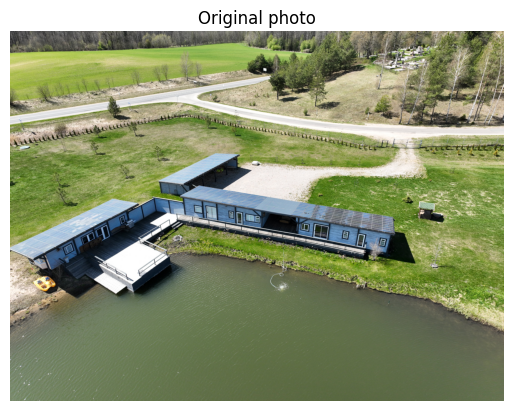

: 

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_image(title, img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
image_path = "dronas1.jpg"

img = cv2.imread(image_path)

if img is None:
    print("Not able to find the image. Check image path.")
else:
    show_image("Original photo", img)

# Savybių ištraukimas ir suderinimas:

Išbandykite pasirinktus metodus su drono vaizdais.   
Būdingųjų taškų paieškai parinkite 3 iš šių:    
- SIFT (Scale-Invariant Feature Transform)
- SURF (Speeded-Up Robust Features)
- ORB (Oriented FAST and Rotated BRIEF)
- BRISK (Binary Robust Invariant Scalable Keypoints)
- AKAZE (Accelerated KAZE)    


Sutapdinimui išbandykite bent du iš šių:
- Brute-Force Matcher su skirtingomis atstumo metrikomis (pvz., L2 norm, Hamming).
- FLANN (Fast Library for Approximate Nearest Neighbors).
- [alternatyvus, pasirinktas savo nuožiūra].     


Pakartokite tą patį su akinių rėmelių vaizdais.    
Vizualizuokite rezultatus (pvz., parodykite sutampančius taškus).   

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread("koridorius1.jpeg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("koridorius2.jpeg", cv2.IMREAD_GRAYSCALE)

if image1 is None or image2 is None:
    print("Not able to upload image. Check image path.")
    exit()

def detect_and_match_features(detector, matcher, img1, img2):
    # Būdingi taškai ir deskriptoriai
    keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
    keypoints2, descriptors2 = detector.detectAndCompute(img2, None)

    # Atitikmenų paieška
    matches = matcher.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Vaizdo atitikmenų vizualizavimas
    result_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:20], None,
                                   flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(16, 8))
    plt.imshow(result_image, cmap='gray')
    plt.title(f'Method: {type(detector).__name__}')
    plt.axis('off')
    plt.show()

# Pasirinkti detektoriai
detectors = {
    "SIFT": cv2.SIFT_create(),
    #"ORB": cv2.ORB_create(),
    #"BRISK": cv2.BRISK_create(),
    #"SURF": cv2.xfeatures2d.SURF_create(),
    #"AKAZE": cv2.AKAZE_create()
}

# Pasirinkti suderinimo algoritmai
matchers = {
    #"Brute-Force (L2)": cv2.BFMatcher(cv2.NORM_L2),
    #"Brute-Force (Hamming)": cv2.BFMatcher(cv2.NORM_HAMMING),
    "FLANN": cv2.FlannBasedMatcher(dict(algorithm=1, trees=5), dict(checks=50))
}

# Testavimas su įvairiais deriniais
for detector_name, detector in detectors.items():
    for matcher_name, matcher in matchers.items():
        print(f"Used method: {detector_name} and {matcher_name}")
        try:
            detect_and_match_features(detector, matcher, image1, image2)
        except Exception as e:
            print(f"Error with {detector_name} and {matcher_name}: {e}")

Used method: SIFT and FLANN


: 

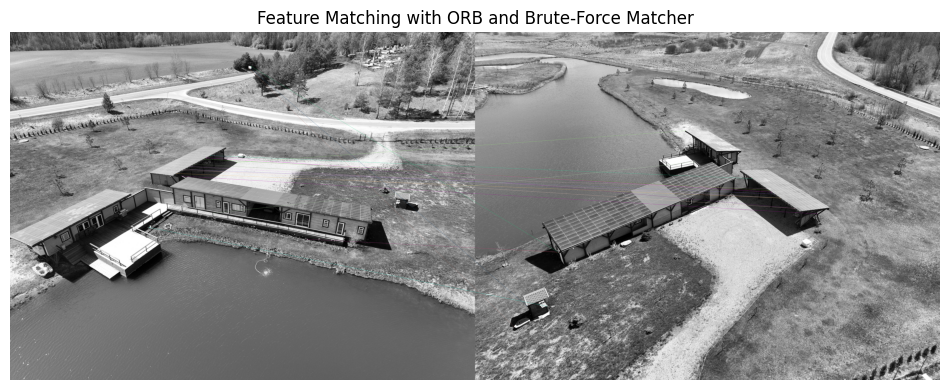

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image1 = cv2.imread("dronas1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("dronas2.jpg", cv2.IMREAD_GRAYSCALE)

if image1 is None or image2 is None:
    print("Error loading images. Make sure the paths are correct.")
else:
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

    # Use Brute-Force Matcher with Hamming distance
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches by distance (lower distance is better)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top 20 matches
    match_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the result
    plt.figure(figsize=(12, 6))
    plt.imshow(match_image)
    plt.title("Feature Matching with ORB and Brute-Force Matcher")
    plt.axis("off")
    plt.show()


In [1]:
import cv2
import matplotlib.pyplot as plt

# Load and convert the images to grayscale
image1 = cv2.imread("dronas1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("dronas2.jpg", cv2.IMREAD_GRAYSCALE)

if image1 is None or image2 is None:
    print("Error loading images. Make sure the paths are correct.")
else:
    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    # FLANN parameters for matching
    index_params = dict(algorithm=1, trees=5)  # 1 for KDTree
    search_params = dict(checks=50)  # Number of times to search the tree

    # Use FLANN matcher
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Perform matching using k-nearest neighbors (k=2)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test to filter matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw top 20 matches
    match_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches[:20], None,
                                   flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the result
    plt.figure(figsize=(12, 6))
    plt.imshow(match_image)
    plt.title("Feature Matching with SIFT and FLANN Matcher")
    plt.axis("off")
    plt.show()


: 

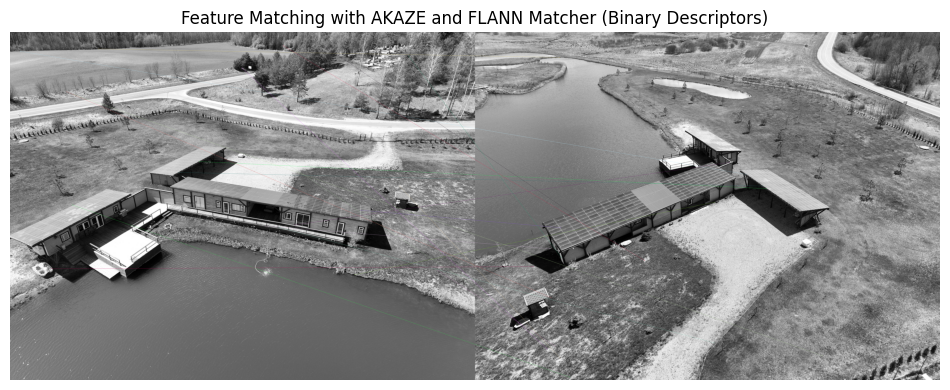

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load and convert the images to grayscale
image1 = cv2.imread("dronas1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("dronas2.jpg", cv2.IMREAD_GRAYSCALE)

if image1 is None or image2 is None:
    print("Error loading images. Make sure the paths are correct.")
else:
    # Initialize AKAZE detector
    akaze = cv2.AKAZE_create()

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = akaze.detectAndCompute(image1, None)
    keypoints2, descriptors2 = akaze.detectAndCompute(image2, None)

    # FLANN parameters for binary descriptors
    index_params = dict(algorithm=6,  # LSH
                         table_number=12,  # Number of hash tables
                         key_size=20,  # Size of the key
                         multi_probe_level=2)  # Number of levels to use
    search_params = dict(checks=50)

    # Use FLANN matcher
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Perform matching using k-nearest neighbors (k=2)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test to filter matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw top 20 matches
    match_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches[:20], None,
                                   flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the result
    plt.figure(figsize=(12, 6))
    plt.imshow(match_image)
    plt.title("Feature Matching with AKAZE and FLANN Matcher (Binary Descriptors)")
    plt.axis("off")
    plt.show()


# Panoramos kūrimas

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def load_images_from_folder(folder_path):
    """Loads and sorts images from a folder."""
    image_paths = sorted([
        os.path.join(folder_path, filename)
        for filename in os.listdir(folder_path)
        if filename.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])
    
    if not image_paths:
        raise FileNotFoundError("No image files found in the specified folder.")
    
    images = [cv2.imread(path) for path in image_paths]
    return images

def stitch_images(images):
    """Stitches multiple images into a panorama."""
    panorama = images[0]
    sift = cv2.SIFT_create()

    for i in range(1, len(images)):
        gray1 = cv2.cvtColor(panorama, cv2.COLOR_BGR2GRAY)
        gray2 = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)

        keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
        keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

        index_params = dict(algorithm=1, trees=5)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(descriptors1, descriptors2, k=2)

        good_matches = []
        for m, n in matches:
            if m.distance < 0.7 * n.distance:
                good_matches.append(m)

        if len(good_matches) > 10:
            src_points = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
            dst_points = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

            homography_matrix, mask = cv2.findHomography(dst_points, src_points, cv2.RANSAC, 5.0)

            height, width, channels = panorama.shape
            warped_image = cv2.warpPerspective(images[i], homography_matrix, (width * 2, height))

            warped_image[0:height, 0:width] = panorama
            panorama = warped_image

    return panorama


# Folder containing the images
folder_path = "./panorama"  # Replace with your folder path

try:
    images = load_images_from_folder(folder_path)
    result_panorama = stitch_images(images)

    plt.figure(figsize=(18, 8))
    plt.imshow(cv2.cvtColor(result_panorama, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Panorama from Folder Images")
    plt.show()

except Exception as e:
    print("Error:", e)


: 